In [1]:
import pandas as pd
import openpyxl
import numpy as np
import plotly.express as px
import imageio

In [7]:
continents = pd.read_csv(r"/Users/wukaiti/Spiced/my_encounter_notes/week_01/data/continents.csv", sep = ";",index_col=None)
lifeexpect = pd.read_excel(r"/Users/wukaiti/Spiced/my_encounter_notes/week_01/data/gapminder_lifeexpectancy.xlsx", index_col=None)
fertility = pd.read_csv(r"/Users/wukaiti/Spiced/my_encounter_notes/week_01/data/gapminder_total_fertility.csv", index_col=None)
population = pd.read_excel(r"/Users/wukaiti/Spiced/my_encounter_notes/week_01/data/gapminder_population.xlsx")

In [8]:
fertility1 = fertility.copy()
fertility1.columns


Index(['Total fertility rate', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=217)

In [9]:
fertility1 = fertility1.set_index("Total fertility rate")
fertility1.columns = fertility1.columns.astype(int)

In [8]:
fertility1

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total fertility rate,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zambia,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,...,5.93,5.91,5.88,5.85,5.81,5.77,5.73,5.69,5.64,5.59
Zimbabwe,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,...,3.94,3.90,3.85,3.79,3.72,3.64,3.56,3.49,3.41,3.35


In [10]:

#fertility1.set_index('country',inplace=True) 
fertility1.index.name = "country"
fertility1 = fertility1.reset_index()
fertility1 = fertility1.melt(id_vars='country', var_name='year', value_name='fertility')

In [10]:
fertility1

,country,year,fertility
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99
...,...,...,...
56155,Yugoslavia,2015,NaN
56156,Zambia,2015,5.59
56157,Zimbabwe,2015,3.35
56158,Åland,2015,NaN


In [11]:
fertility1["year"] = fertility1["year"].astype(int)
fertility1["fertility"] = fertility1["fertility"].astype(float)

In [12]:
fertility1

,country,year,fertility
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99
...,...,...,...
56155,Yugoslavia,2015,NaN
56156,Zambia,2015,5.59
56157,Zimbabwe,2015,3.35
56158,Åland,2015,NaN


In [12]:
lifeexpect1 = lifeexpect.copy()
lifeexpect1.set_index("Life expectancy", inplace = True)
lifeexpect1.index.name = "country"
lifeexpect1.columns = lifeexpect1.columns.astype(int)
lifeexpect1 = lifeexpect1.reset_index()
lifeexpect1 = lifeexpect1.melt(id_vars='country', var_name='year', value_name='life_expectancy')
lifeexpect1["year"] = lifeexpect1["year"].astype(int)
lifeexpect1["life_expectancy"] = lifeexpect1["life_expectancy"].astype(float)
lifeexpect1

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82
...,...,...,...
56415,Yugoslavia,2016,NaN
56416,Zambia,2016,57.10
56417,Zimbabwe,2016,61.69
56418,Åland,2016,NaN


In [13]:

population1 = population.copy()
population1.set_index('Total population',inplace=True) 
population1.columns = population1.columns.astype(int)
population1.index.name = "country"
population1 = population1.reset_index()
population1 = population1.melt(id_vars='country', var_name='year', value_name='population')
population1["year"] = population1["year"].astype(int)
population1["population"] = population1["population"].astype(float)


In [14]:
population1 = population1.drop_duplicates()
population1 = population1.dropna()
lifeexpect1 = lifeexpect1.drop_duplicates()
lifeexpect1 = lifeexpect1.dropna()
fertility1 = fertility1.drop_duplicates()
fertility1 = fertility1.dropna()

In [24]:
len(population1.country.unique())

256

In [25]:
len(fertility1.country.unique())

201

In [26]:
len(population1.country.unique())

256

In [15]:
df = pd.merge(population1, lifeexpect1, on="country")

In [17]:
df

,country,year_x,population,year_y,life_expectancy
0,Afghanistan,1800,3280000.0,1800,28.21
1,Afghanistan,1800,3280000.0,1801,28.20
2,Afghanistan,1800,3280000.0,1802,28.19
3,Afghanistan,1800,3280000.0,1803,28.18
4,Afghanistan,1800,3280000.0,1804,28.17
...,...,...,...,...,...
3544834,Åland,2010,26923.0,2002,81.80
3544835,Åland,2010,26923.0,2003,80.63
3544836,Åland,2010,26923.0,2004,79.88
3544837,Åland,2010,26923.0,2005,80.00


In [16]:
df.drop(columns="year_y",inplace=True)
df.rename(columns={"year_x":"year"},inplace=True)
df

,country,year,population,life_expectancy
0,Afghanistan,1800,3280000.0,28.21
1,Afghanistan,1800,3280000.0,28.20
2,Afghanistan,1800,3280000.0,28.19
3,Afghanistan,1800,3280000.0,28.18
4,Afghanistan,1800,3280000.0,28.17
...,...,...,...,...
3544834,Åland,2010,26923.0,81.80
3544835,Åland,2010,26923.0,80.63
3544836,Åland,2010,26923.0,79.88
3544837,Åland,2010,26923.0,80.00


In [17]:
df1 = pd.merge(df, fertility1, on = "country")


In [24]:
dfnew = lifeexpect1.merge(population1)

In [25]:
dfnew2 = dfnew.merge(fertility1)

In [26]:
dfnew2

,country,year,life_expectancy,population,fertility
0,Afghanistan,1800,28.21,3280000.0,7.00
1,Albania,1800,35.40,410445.0,4.60
2,Algeria,1800,28.82,2503218.0,6.99
3,Angola,1800,26.98,1567028.0,6.93
4,Antigua and Barbuda,1800,33.54,37000.0,5.00
...,...,...,...,...,...
16225,Vietnam,2015,75.40,93447601.0,1.70
16226,Virgin Islands (U.S.),2015,80.60,106291.0,2.45
16227,Yemen,2015,66.00,26832215.0,3.83
16228,Zambia,2015,56.70,16211767.0,5.59


In [27]:
continents = pd.read_csv(r"/Users/wukaiti/Spiced/my_encounter_notes/week_01/data/continents.csv", sep = ";",index_col=None)

In [28]:
continents.set_index("country")

,continent
country,
Algeria,Africa
Angola,Africa
Benin,Africa
Botswana,Africa
Burkina,Africa
...,...
Paraguay,South America
Peru,South America
Suriname,South America


In [83]:
dfnew3 = dfnew2.merge(continents)

In [2]:
dfnew3 = pd.read_csv("week1_proj.csv",index_col=None)

In [45]:
dfnew3.to_csv("week1_proj.csv",index_label=None)

In [5]:
dfnew3.drop(columns=["Unnamed: 0"], inplace=True)

<AxesSubplot:xlabel='life_expectancy', ylabel='fertility'>

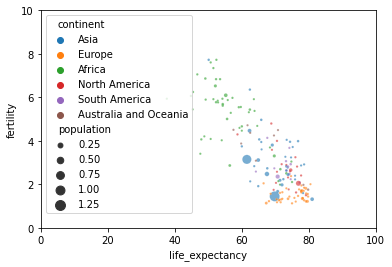

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.xlim(0,100)
plt.ylim(0,10)
plt.rcParams
df_subset = dfnew3.loc[dfnew3['year'] == 2000]
sns.scatterplot(
    x='life_expectancy', y='fertility',
    data=df_subset, alpha=0.6,
    hue = "continent",size = "population",sizes=(5, 100))

In [97]:
dfnew3

,country,year,life_expectancy,population,fertility,continent
0,Afghanistan,1800,28.21,3280000.0,7.00,Asia
1,Afghanistan,1810,28.11,3280000.0,7.00,Asia
2,Afghanistan,1820,28.01,3323519.0,7.00,Asia
3,Afghanistan,1830,27.90,3448982.0,7.00,Asia
4,Afghanistan,1840,27.80,3625022.0,7.00,Asia
...,...,...,...,...,...,...
13441,Zimbabwe,2011,51.60,14255592.0,3.64,Africa
13442,Zimbabwe,2012,54.20,14565482.0,3.56,Africa
13443,Zimbabwe,2013,55.70,14898092.0,3.49,Africa
13444,Zimbabwe,2014,57.00,15245855.0,3.41,Africa


In [99]:
d = dfnew3.groupby("year")
d

In [133]:
import imageio
import seaborn as sns
from matplotlib import style
from matplotlib.pyplot import figure



plt.style.use('Solarize_Light2')

for year in range(1980, 1986):
    df_subset = dfnew3.loc[dfnew3['year'] == year]
    results = sns.scatterplot(
        x="fertility",
        y="life_expectancy",
        data=df_subset,
        hue="continent",
        size="population",
        sizes=(20,2000))
    h,l = results.get_legend_handles_labels()
    plt.rcParams['figure.figsize'] = [15, 9]
    plt.grid(color='w', linestyle='solid')
    plt.legend(h[0:7], l[0:7], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.savefig(f"{year}_figure.png")
    plt.close() # close the plots so it does not stack on each other
    
imageio.mimsave('plot.gif', images, fps=20)

In [135]:
import imageio
import seaborn as sns
from matplotlib import style
from matplotlib.pyplot import figure



plt.style.use('Solarize_Light2')

for year in range(1980, 1986):
    df_subset = dfnew3.groupby("year")
    results = sns.scatterplot(
        x="fertility",
        y="life_expectancy",
        data=df_subset,
        hue="continent",
        size="population",
        sizes=(20,2000))
    h,l = results.get_legend_handles_labels()
    plt.rcParams['figure.figsize'] = [15, 9]
    plt.grid(color='w', linestyle='solid')
    plt.legend(h[0:7], l[0:7], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.savefig(f"{year}_figure.png")
    plt.close() # close the plots so it does not stack on each other
    
imageio.mimsave('plot.gif', images, fps=20)

ValueError: Could not interpret value `fertility` for parameter `x`